In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [ ]:
cancer= pd.read_csv('cancer.csv')

In [ ]:
cancer.head(3)   # Display the first few rows
                 # 'M' for malignant, 'B' for benign tumors

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


In [ ]:
# Convert the target variable to numeric format
cancer['diagnosis'] = np.where(cancer['diagnosis'] == 'M', 1, 0)  # 'M' -> 1, 'B' -> 0

y= cancer[['diagnosis']]   #target variable
x= cancer.drop(columns= ['diagnosis', 'id', 'Unnamed: 32'], axis=1)    #drop unnecessary columns

print(x.head())

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           

In [ ]:
# To view the number of rows and columns in the dataset:
cancer.shape # -> (rows, columns)

(569, 33)

In [ ]:
# Prints the columns in the dataset as a list:
print(list(cancer.columns), '\n')

['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'] 



In [ ]:
cancer.info()    # Get information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# To view only the variables and their types:
cancer.dtypes

,0
id,int64
diagnosis,int64
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64


In [ ]:
# Missing Data Analysis

# The isna() method returns a boolean indicating if there are missing values in the dataset.
# sum() returns the total count.
cancer.isna().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [ ]:
cancer.isna().sum().sum()  # Total count of missing values

569

In [ ]:
cancer.drop(columns=['Unnamed: 32'], inplace=True)

In [ ]:
cancer.isna().sum().sum()

0

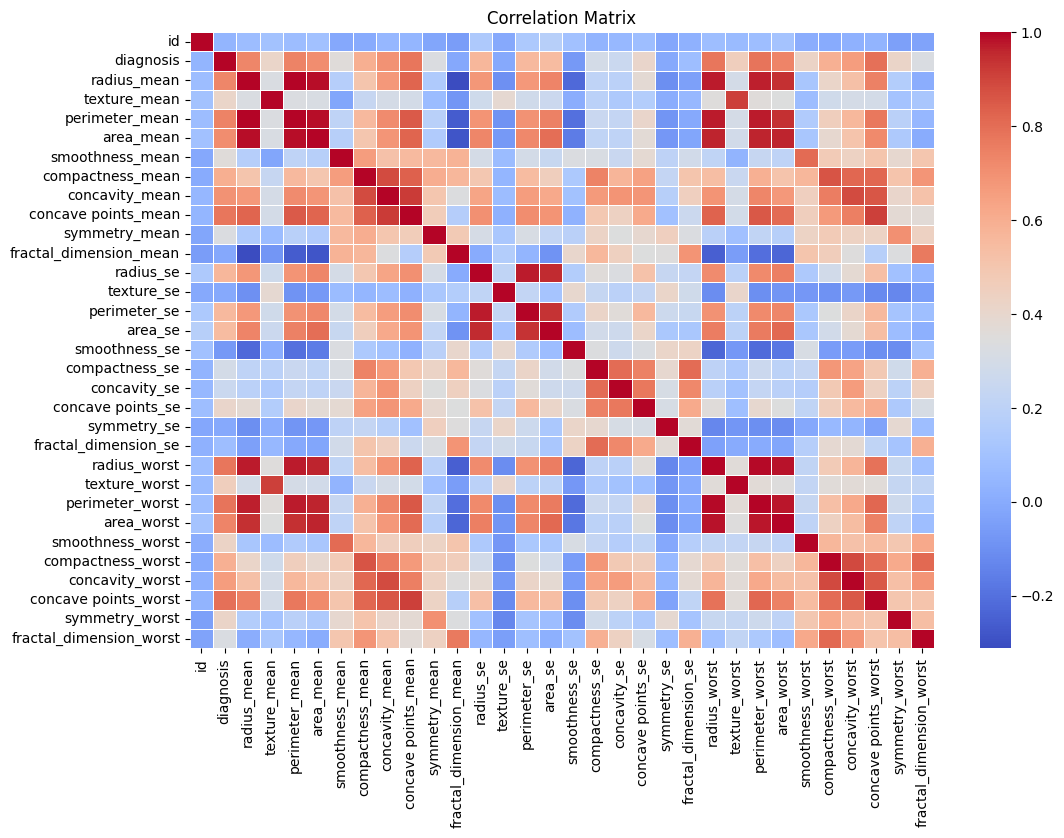

In [ ]:
# Calculating the correlation matrix
correlation_matrix = cancer.corr()

# Visualizing the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Detecting outliers using the IQR method
def check_outliers(df):
    outliers = {}

    for column in df.select_dtypes(include=['float64', 'int64']).columns:  # Process numerical columns
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR
        # Check if there are any outliers
        column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        # If outliers exist, add the column name and the count of outliers
        if len(column_outliers) > 0:
            outliers[column] = len(column_outliers)

    return outliers

# Check for outliers
outliers = check_outliers(cancer)

# If outliers are found, display the columns and their counts
if outliers:
    print("Outliers Found:")
    for column, count in outliers.items():
        print(f"Column: {column}, Number of Outliers: {count}")
else:
    print("No outliers found in the dataset.")

Outliers Found:
Column: id, Number of Outliers: 81
Column: radius_mean, Number of Outliers: 1
Column: texture_mean, Number of Outliers: 1
Column: area_mean, Number of Outliers: 5
Column: smoothness_mean, Number of Outliers: 1
Column: compactness_mean, Number of Outliers: 1
Column: symmetry_mean, Number of Outliers: 1
Column: fractal_dimension_mean, Number of Outliers: 4
Column: radius_se, Number of Outliers: 7
Column: texture_se, Number of Outliers: 4
Column: perimeter_se, Number of Outliers: 12
Column: area_se, Number of Outliers: 22
Column: smoothness_se, Number of Outliers: 7
Column: compactness_se, Number of Outliers: 6
Column: concavity_se, Number of Outliers: 6
Column: concave points_se, Number of Outliers: 3
Column: symmetry_se, Number of Outliers: 9
Column: fractal_dimension_se, Number of Outliers: 11
Column: perimeter_worst, Number of Outliers: 1
Column: area_worst, Number of Outliers: 7
Column: compactness_worst, Number of Outliers: 3
Column: concavity_worst, Number of Outlie

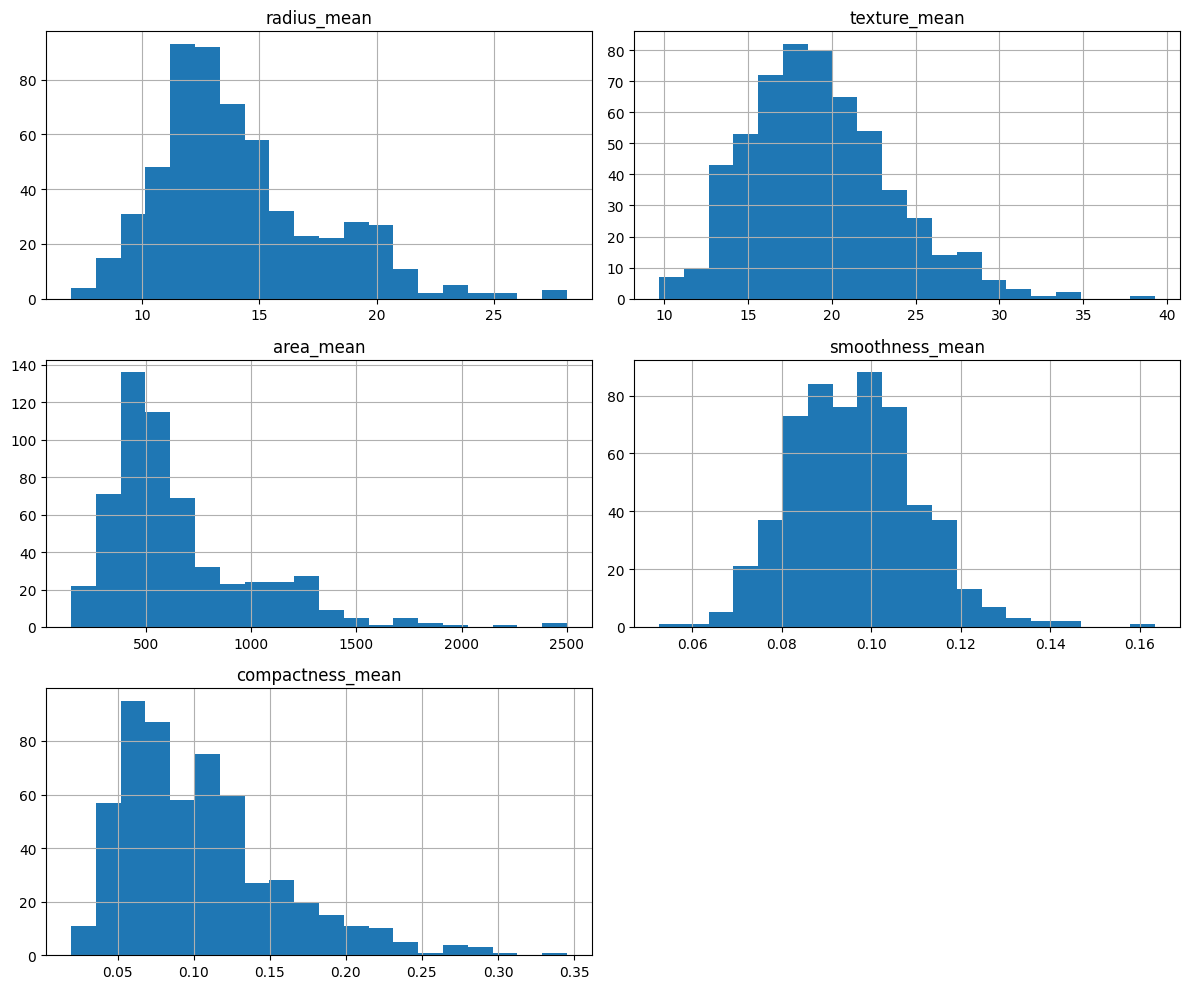

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing histograms (to observe outliers)
cancer[['radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean', 'compactness_mean']].hist(bins=20, figsize=(12, 10))
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import zscore
import numpy as np

# Calculate Z-Score
df_zscore = cancer[['radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean', 'compactness_mean']].apply(zscore)

# Identify values with Z-Score greater than 3
cancer.loc[(df_zscore > 3).any(axis=1), ['radius_mean', 'texture_mean', 'area_mean']] = np.nan

# Fill missing values with the median
cancer.fillna(cancer.median(), inplace=True)

In [ ]:
# Define the limits
lower_limit = cancer['radius_mean'].quantile(0.05)
upper_limit = cancer['radius_mean'].quantile(0.95)

# Limit the data within the specified range
cancer['radius_mean'] = cancer['radius_mean'].clip(lower=lower_limit, upper=upper_limit)

In [ ]:
# Check for outliers
import numpy as np

# Detect using Z-Score
z_scores = cancer[['radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean', 'compactness_mean']].apply(zscore)

# Identify rows containing outliers
outliers = (z_scores > 3).sum()
print("Number of Outliers:")
print(outliers)

Number of Outliers:
radius_mean         0
texture_mean        1
area_mean           5
smoothness_mean     4
compactness_mean    9
dtype: int64


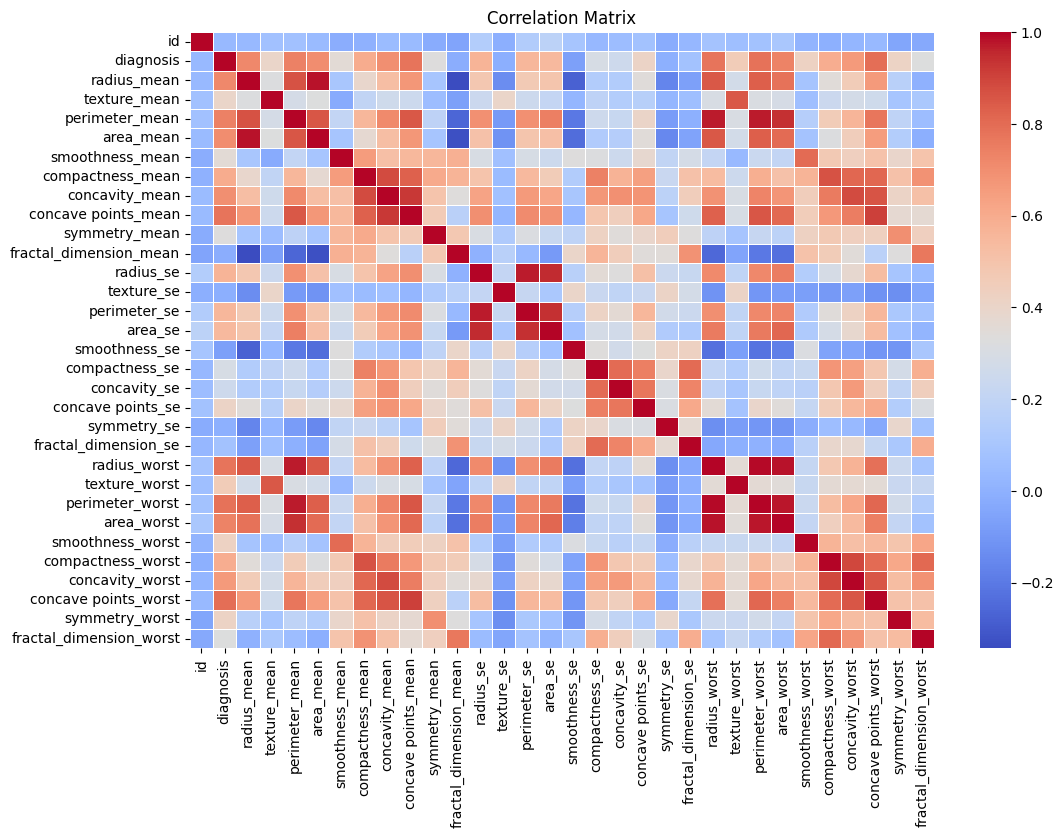

In [ ]:
# Calculate the correlation matrix
correlation_matrix = cancer.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Z-Score scaling
scaler = StandardScaler()

# Select relevant columns
features = ['radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
            'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
            'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
            'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se',
            'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
            'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst',
            'fractal_dimension_worst']

# Scale the data using Z-Score
cancer[features] = scaler.fit_transform(cancer[features])

# Check the first few rows
print(cancer.head())

         id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1    -0.206299     -0.087756          122.80  -0.280640   
1    842517          1     2.134240     -0.335879          132.90   2.342272   
2  84300903          1     1.964865      0.536312          130.00   1.930927   
3  84348301          1    -0.206299     -0.087756           77.58  -0.280640   
4  84358402          1     2.134240     -1.195539          135.10   2.245288   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0         1.568466          3.283515        2.652874             2.532475   
1        -0.826962         -0.487072       -0.023846             0.548144   
2         0.942210          1.052926        1.363478             2.037231   
3         3.283553          3.402909        1.915897             1.451707   
4         0.280372          0.539340        1.371011             1.428493   

   ...  radius_worst  texture_worst  perimeter_worst  ar

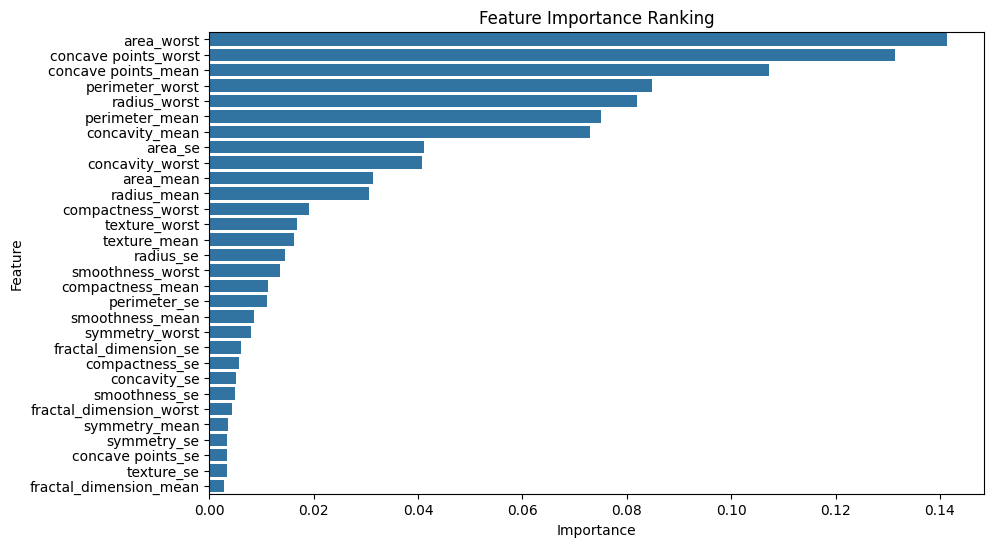

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (For example, cancer dataset)
# df = pd.read_csv("your_dataset.csv")

# Separate features and target variable
X = cancer.drop(['diagnosis', 'id'], axis=1)  # Features excluding the target variable and ID
y = cancer['diagnosis']  # Target variable

# Create and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importance
importances = model.feature_importances_

# Get feature names
feature_names = X.columns

# Convert feature importance to a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance Ranking')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Split features (X) and target variable (y)
X = cancer.drop('diagnosis', axis=1)  # 'diagnosis' column is the target variable
y = cancer['diagnosis']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Decision Tree
dt_scores = cross_val_score(dt_model, X, y, cv=5)  # cv: number of folds
print("Decision Tree Average Accuracy: ", dt_scores.mean())

# Cross-validation for Random Forest
rf_scores = cross_val_score(rf_model, X, y, cv=5)
print("Random Forest Average Accuracy: ", rf_scores.mean())

Decision Tree Average Accuracy:  0.9191119391398852
Random Forest Average Accuracy:  0.9596180717279925


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

# Decision Tree Prediction
dt_pred = dt_model.predict(X_test)
print("Decision Tree Accuracy: ", accuracy_score(y_test, dt_pred))
print("Decision Tree F1 Score: ", f1_score(y_test, dt_pred))

# Random Forest Prediction
rf_pred = rf_model.predict(X_test)
print("Random Forest Accuracy: ", accuracy_score(y_test, rf_pred))
print("Random Forest F1 Score: ", f1_score(y_test, rf_pred))

Decision Tree Accuracy:  0.9385964912280702
Decision Tree F1 Score:  0.9195402298850575
Random Forest Accuracy:  0.9649122807017544
Random Forest F1 Score:  0.9523809523809523


In [ ]:
from sklearn.model_selection import cross_val_score

# k-Fold Cross-Validation for Decision Tree
dt_cv_scores = cross_val_score(dt_model, X, y, cv=5, scoring='accuracy')  # 5-fold
print("Decision Tree - Average Accuracy (CV): ", dt_cv_scores.mean())
print("Decision Tree - Accuracy Scores for All Folds: ", dt_cv_scores)

# k-Fold Cross-Validation for Random Forest
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')  # 5-fold
print("Random Forest - Average Accuracy (CV): ", rf_cv_scores.mean())
print("Random Forest - Accuracy Scores for All Folds: ", rf_cv_scores)


Decision Tree - Average Accuracy (CV):  0.9191119391398852
Decision Tree - Accuracy Scores for All Folds:  [0.9122807  0.88596491 0.94736842 0.95614035 0.89380531]
Random Forest - Average Accuracy (CV):  0.9596180717279925
Random Forest - Accuracy Scores for All Folds:  [0.92982456 0.93859649 0.98245614 0.96491228 0.98230088]


In [ ]:
# F1 score for Decision Tree
dt_f1_cv_scores = cross_val_score(dt_model, X, y, cv=5, scoring='f1')
print("Decision Tree - Average F1 Score (CV): ", dt_f1_cv_scores.mean())

# F1 score for Random Forest
rf_f1_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='f1')
print("Random Forest - Average F1 Score (CV): ", rf_f1_cv_scores.mean())

Decision Tree - Average F1 Score (CV):  0.8948383194095456
Random Forest - Average F1 Score (CV):  0.9450637791723062


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [ ]:
# Decision Tree prediction
dt_pred = dt_model.predict(X_test)

# Random Forest prediction
rf_pred = rf_model.predict(X_test)


In [ ]:
# For Decision Tree
print("Decision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, dt_pred))
print("Precision:", precision_score(y_test, dt_pred))
print("Recall:", recall_score(y_test, dt_pred))
print("F1 Score:", f1_score(y_test, dt_pred))

Decision Tree Performance:
Accuracy: 0.9385964912280702
Precision: 0.9090909090909091
Recall: 0.9302325581395349
F1 Score: 0.9195402298850575


In [ ]:
# For Random Forest
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Precision:", precision_score(y_test, rf_pred))
print("Recall:", recall_score(y_test, rf_pred))
print("F1 Score:", f1_score(y_test, rf_pred))

Random Forest Performance:
Accuracy: 0.9649122807017544
Precision: 0.975609756097561
Recall: 0.9302325581395349
F1 Score: 0.9523809523809523
